# Imports

In [1]:
import datatable as dt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# File Read In

In [2]:
%%time

# datatable
tps_dt = dt.fread("data/train.csv").to_pandas()
tps_dt.head()

CPU times: total: 9.8 s
Wall time: 993 ms


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,True
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,False
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,True
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,True
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,True


In [3]:
%%time

# pandas
tps_df = pd.read_csv("data/train.csv")
tps_df.head()

CPU times: total: 14.2 s
Wall time: 11 s


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


# Memory Size

In [4]:
memory_usage = tps_df.memory_usage(deep=True) / 1024 ** 2  # 1024**2 to change byte to MB

In [5]:
memory_usage

Index    0.000122
id       7.308342
f1       7.308342
f2       7.308342
f3       7.308342
           ...   
f115     7.308342
f116     7.308342
f117     7.308342
f118     7.308342
claim    7.308342
Length: 121, dtype: float64

In [6]:
memory_usage.sum()

877.0011596679688

# Handy function that reduces the memory of pandas DataFrames

In [7]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

In [8]:
reduced_df = reduce_memory_usage(tps_df, verbose=True)

Mem. usage decreased to 262.19 Mb (70.1% reduction)


Note that memory reduction won’t speed up computation in most cases. If the memory size is not an issue, you can skip this step.

# Sample the data

Regardless of any speed tricks or packages on GPU steroids, too much data, well, is too much. When you have millions of rows, there is a good chance you can sample them so that all feature distributions are preserved.

This is done mainly to speed up computation. Take a small sample instead of running experiments, feature engineering, and training baseline models on all the data. Typically, 10–20% is enough. Here is how it is done in pandas:

In [9]:
sample_df = tps_df.sample(int(len(tps_df) * 0.2))
sample_df.shape

(191583, 120)

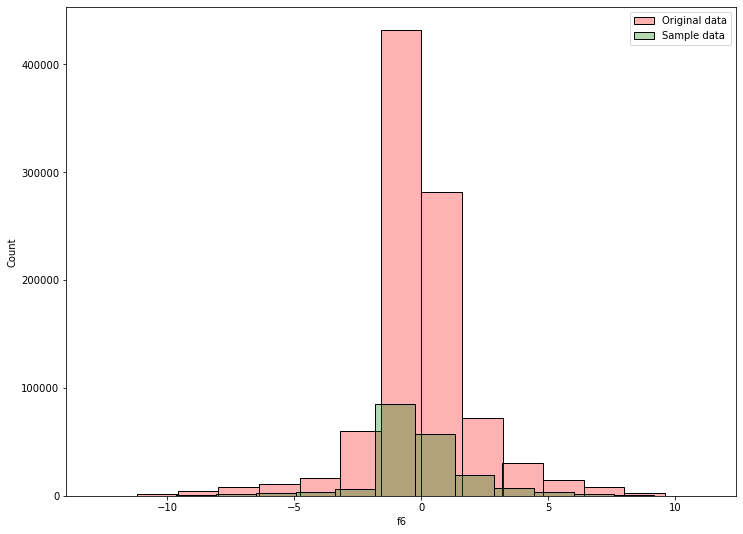

In [10]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
    data=tps_df, x="f6", label="Original data", color="red", alpha=0.3, bins=15
)
sns.histplot(
    data=sample_df, x="f6", label="Sample data", color="green", alpha=0.3, bins=15
)

plt.legend()
plt.show();

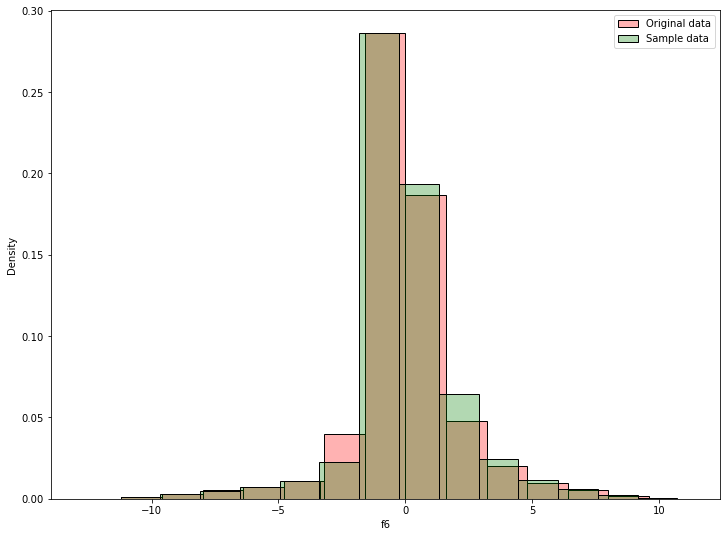

In [11]:
fig, ax = plt.subplots(figsize=(12, 9))

sns.histplot(
    data=tps_df, x="f6", label="Original data", color="red", stat="density", alpha=0.3, bins=15
)
sns.histplot(
    data=sample_df, x="f6", label="Sample data", color="green", stat="density", alpha=0.3, bins=15
)

plt.legend()
plt.show();